In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv("datos/attacks_modificado_4.csv", index_col = 0)
df.head(2) 

,unnamed:_0,case_number,year,type,country,area,location,activity,name,age,time,species_,href,siglo,injury,date,month,fatal_y/n,sex_m_f
0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,N,F
1,6,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,FATAL,03-Jun-2018,Jun,Y,M


Objetivos
- Los objetivos de hoy son:
- Haced una exploración inicial del dataframe:


- ¿Cuál es el número de filas y columnas?



In [4]:
df.shape

(1672, 19)

- ¿Cuál es el porcentaje de valores nulos en cada columna? Presenta los resultados en un dataframe, donde las columnas sean el nombre de las variables y el porcentaje de nulos.


In [15]:
df_nulos = pd.DataFrame(df.isnull().sum() * 100 / df.shape[0]).T
df_nulos

,unnamed:_0,case_number,year,type,country,area,location,activity,name,age,time,species_,href,siglo,injury,date,month,fatal_y/n,sex_m_f
0,0.0,0.0,0.0,0.0,0.598086,2.751196,3.050239,1.854067,0.538278,9.210526,9.569378,7.535885,0.0,89.832536,0.478469,0.0,10.825359,5.921053,0.0


In [ ]:
# Vemos que sobretodo la columna de siglo es la que más nulos tiene, debió de haber un error cuando la creamos en ejercicios anteriores

- ¿Qué tipos de datos hay en cada columna?


In [5]:
df.dtypes

unnamed:_0       int64
case_number     object
year           float64
type            object
country         object
area            object
location        object
activity        object
name            object
age             object
time            object
species_        object
href            object
siglo           object
injury          object
date            object
month           object
fatal_y/n       object
sex_m_f         object
dtype: object

- Extraed la información general del dataframe.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1671
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unnamed:_0   1672 non-null   int64  
 1   case_number  1672 non-null   object 
 2   year         1672 non-null   float64
 3   type         1672 non-null   object 
 4   country      1662 non-null   object 
 5   area         1626 non-null   object 
 6   location     1621 non-null   object 
 7   activity     1641 non-null   object 
 8   name         1663 non-null   object 
 9   age          1518 non-null   object 
 10  time         1512 non-null   object 
 11  species_     1546 non-null   object 
 12  href         1672 non-null   object 
 13  siglo        170 non-null    object 
 14  injury       1664 non-null   object 
 15  date         1672 non-null   object 
 16  month        1491 non-null   object 
 17  fatal_y/n    1573 non-null   object 
 18  sex_m_f      1672 non-null   object 
dtypes: flo

In [ ]:
# Hay columnas como year y age que podrían ser de tipo numérico y son floats.
# Vemos también que las fechas podrían cambiarse a datetime, lo haremos cuando sean necesarias

- Cread dos dataframes nuevos, uno que incluya solo las variables categóricas y otro que incluya solo las variables numéricas.


In [7]:
categoricas = df.select_dtypes(include = "object")
categoricas.head(1)

,case_number,type,country,area,location,activity,name,age,time,species_,href,siglo,injury,date,month,fatal_y/n,sex_m_f
0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,N,F


In [8]:
numericas = df.select_dtypes(include = "number")
numericas.head(1)

,unnamed:_0,year
0,0,2018.0



- ¿Cuáles son los principales estádisticos de los dataframes?


In [9]:
categoricas.describe().T

,count,unique,top,freq
case_number,1672,1672,2018.06.25,1
type,1672,6,Unprovoked,1432
country,1662,95,USA,741
area,1626,236,Florida,346
location,1621,1310,"New Smyrna Beach, Volusia County",73
activity,1641,404,Surfing,426
name,1663,1536,male,97
age,1518,94,19,70
time,1512,248,11h00,74
species_,1546,856,White shark,76


In [ ]:
# El país que más ataques ha reportado es USA, en específico Florida.
# La actividad más común es el surf, realizado por hombres que suelen ser de unos 19 años.
# El mes más frecuente es agosto y los ataques no suelen ser letales

In [23]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,1672.0,2581.067584,1761.030926,0.0,1222.25,2216.0,3697.5,6301.0
year,1672.0,1832.688397,528.969901,0.0,1964.00,1997.0,2008.0,2018.0


In [ ]:
# Hay mucha disparidad en los años, 
# por lo que nos fiamos más de la mediana que de la media para hacernos una idea de los años en los que ocurrieron los ataques

- Extraed los valores únicos su frecuencia. BONUS presenta los resultados en un dataframe. Os deberá quedar algo como esto:

In [24]:
for col in categoricas.columns:
    print("------------------------------------------------------------", "\n")
    print(f"En la columna {col} tenemos los siguientes valores unicos y sus frecuencias")
    print(pd.DataFrame(df[col].value_counts()))
    print("\n", "------------------------------------------------------------", "\n")

------------------------------------------------------------ 

En la columna case_number tenemos los siguientes valores unicos
              case_number
2018.06.25              1
1975.07.15              1
1979.11.27              1
1980.00.00.b            1
1980.01.10              1
...                   ...
2005.10.13              1
2005.10.19              1
2005.10.21              1
2005.10.22              1
ND.0001                 1

[1672 rows x 1 columns]

 ------------------------------------------------------------ 

------------------------------------------------------------ 

En la columna type tenemos los siguientes valores unicos
              type
Unprovoked    1432
Provoked       115
Invalid         92
Boating         17
Sea Disaster    12
Boat             4

 ------------------------------------------------------------ 

------------------------------------------------------------ 

En la columna country tenemos los siguientes valores unicos
                    country
US

In [ ]:
# BONUS

In [37]:
categoricas.columns

Index(['case_number', 'type', 'country', 'area', 'location', 'activity',
       'name', 'age', 'time', 'species_', 'href', 'siglo', 'injury', 'date',
       'month', 'fatal_y/n', 'sex_m_f'],
      dtype='object')

In [38]:
dicc = {'variable':[], 'valores_unicos':[], 'frecuencias':[]}

In [39]:
for col in categoricas.columns:
    dicc['variable'].append(col)
    dicc['valores_unicos'].append(list(categoricas[col].value_counts().index))
    dicc['frecuencias'].append(list(categoricas[col].value_counts().values))

In [40]:
dicc

{'variable': ['case_number',
  'type',
  'country',
  'area',
  'location',
  'activity',
  'name',
  'age',
  'time',
  'species_',
  'href',
  'siglo',
  'injury',
  'date',
  'month',
  'fatal_y/n',
  'sex_m_f'],
 'valores_unicos': [['2018.06.25',
   '1975.07.15',
   '1979.11.27',
   '1980.00.00.b',
   '1980.01.10',
   '1980.01.15',
   '1980.01.31',
   '1980.04.00',
   '1980.05.15',
   '1980.07.23',
   '1980.10.17',
   '1980.10.27',
   '1980.11.24',
   '1980.12.30',
   '1981.00.00.b',
   '1981.02.02',
   '1981.02.19',
   '1981.03.24',
   '1981.03.25',
   '1981.05.05',
   '1981.05.10',
   '1981.05.20',
   '1981.05.23',
   '1981.07.18',
   '1981.08.07',
   '1979.05.05',
   '1979.03.24',
   '1979.02.21',
   '1976.10.06',
   '1975.07.23',
   '1975.07.30.a',
   '1975.08.09',
   '1975.08.12',
   '1975.08.17',
   '1975.11.19.a',
   '1975.12.06',
   '1976.06.23',
   '1976.08.24',
   '1976.09.06',
   '1976.10.18',
   '1978.12.12',
   '1976.11.25',
   '1976.11.27',
   '1976.12.18',
   '1977.0

In [41]:
df_uniques = pd.DataFrame(dicc)
df_uniques

,variable,valores_unicos,frecuencias
0,case_number,"[2018.06.25, 1975.07.15, 1979.11.27, 1980.00.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,type,"[Unprovoked, Provoked, Invalid, Boating, Sea D...","[1432, 115, 92, 17, 12, 4]"
2,country,"[USA, AUSTRALIA, SOUTH AFRICA, BAHAMAS, NEW ZE...","[741, 343, 234, 29, 21, 17, 16, 16, 15, 11, 10..."
3,area,"[Florida, California, New South Wales, Hawaii,...","[346, 137, 137, 108, 83, 80, 80, 69, 51, 39, 3..."
4,location,"[New Smyrna Beach, Volusia County, Myrtle Beac...","[73, 7, 7, 7, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4,..."
5,activity,"[Surfing, Swimming, Spearfishing, Fishing, Wad...","[426, 240, 105, 56, 53, 37, 35, 33, 30, 23, 19..."
6,name,"[male, female, males, child, Andre Hartman, bo...","[97, 16, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1..."
7,age,"[19, 18, 20, 15, 17, 25, 21, 22, 16, 24, 23, 2...","[70, 60, 58, 57, 57, 56, 55, 55, 52, 50, 41, 3..."
8,time,"[11h00, Afternoon, 16h00, 15h00, Morning, 14h0...","[74, 69, 53, 51, 50, 50, 49, 48, 46, 37, 36, 3..."
9,species_,"[White shark, Tiger shark, 4' shark, Bull shar...","[76, 37, 34, 32, 26, 21, 19, 18, 17, 15, 15, 1..."


##### Conclusiones
De qué nos sirven estos números y dataframe? Extraed conclusiones de ellos.

Por ejemplo:

¿Hay alguna columna que no tenga sentido su tipo de datos?

¿Hay alguna columna que no tenga sentido su nombre?

¿Hay alguna columna que no tenga sentido su contenido?

¿Hay alguna columna que tenga demasiadas categorías o valores que nos pueda hacer difícil trabajar con ella?


> * El dataframe extraído en base a los valores únicos de cada columna nos sirve para ver a simple vista las columnas que tendremos que limpiar, como la de `species` o aquellas que no nos son de utilidad por repetir información o por ser información poco clasificable, como ocurre con la columna `injury`.
> * También podemos ver los errores, como en la columna `siglo`, que solo ha clasificado los años del siglo XX. Sin embargo, esta columna no aporta mucho valor o información en su contenido.
> * La columna `date` sería útil tras una limpieza y en formato _datetime_

In [ ]:
# Tras la exploración de nuestro dataframe, pasamos a verificar las hipótesis planteadas

Hipótesis

- Las hipótesis que os planteamos son: 
- ¿Es Australia el sitio más peligroso y letal para estar relajada en la playa?


In [25]:
df['country'].value_counts()

USA                   741
AUSTRALIA             343
SOUTH AFRICA          234
BAHAMAS                29
NEW ZEALAND            21
                     ... 
GREENLAND               1
ST. MAARTIN             1
UNITED KINGDOM          1
SWEDEN                  1
CEYLON (SRI LANKA)      1
Name: country, Length: 95, dtype: int64

> NO. Los datos sugieren que el país más peligroso y letal para estar relajada en la playa es USA.

- ¿Hay diferencias entre los países en los ataques a hombres y mujeres?


In [29]:
df.groupby(['country','sex_m_f']).size()


country         sex_m_f
AMERICAN SAMOA  M            2
ARGENTINA       M            1
ASIA?           M            1
AUSTRALIA       F           33
                M          310
                          ... 
VANUATU         F            2
                M            2
VENEZUELA       M            4
VIETNAM         F            2
                M            3
Length: 116, dtype: int64

> Los datos sugieren que sí hay diferencias en la cantidad de ataques por sexo en cada país.

- ¿Cuáles son las edades que más sufren ataques?


In [30]:
df['age'].value_counts()

19          70
18          60
20          58
15          57
17          57
            ..
64           1
74           1
40s          1
60s          1
13 or 14     1
Name: age, Length: 94, dtype: int64

> Las edades que más sufren ataques son de 15 a 20 años.

- Independientemente de la edad, ¿sufren los hombres más ataques que las mujeres?


In [31]:
df['sex_m_f'].value_counts()

M    1445
F     227
Name: sex_m_f, dtype: int64

> Los datos sugieren que los hombres sí sufren más ataques que las mujeres.

- ¿En qué mes ocurren más ataques?


In [32]:
df['month'].value_counts()

Aug    156
Sep    153
Oct    146
Jul    143
Jun    136
Jan    127
Apr    124
May    105
Dec    104
Mar    102
Nov     99
Feb     96
Name: month, dtype: int64

> En Agosto ocurren más ataques. Aunque los datos sugieren el resto de los meses también tienen una cantidad alta de ataques.

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?


In [37]:
df.groupby(['species_','fatal_y/n']).size()

species_                                                        fatal_y/n
                                                                N            3
 "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4']           N            1
 1.5 m [5'] dusky shark                                         N            1
 6' to 8' shark                                                 N            1
 Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7']   N            1
                                                                            ..
small blacktip shark                                            N            1
small blacktip shark?                                           N            1
small shark                                                     N            2
small brown shark                                             N            1
                                                                N            2
Length: 870, dtype: int64

/home/chloeiris/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chloeiris/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chloeiris/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


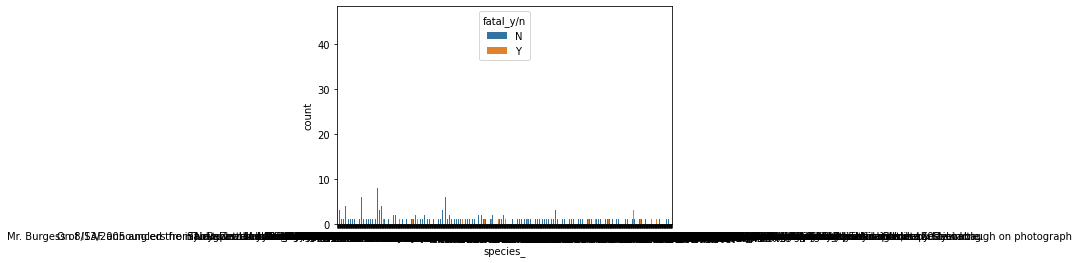

In [43]:
sns.countplot(x='species_', hue= 'fatal_y/n', data = df);

> OJO: PENDIENTE DE REVISAR LA RELACIÓN.
> 
> No se puede ver bien la relación porque tenemos muchas especies de tiburones. Hay que hacer una limpieza urgente de esa columna.

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

In [44]:
df_tiempo = df.groupby(['year'])['case_number'].size().reset_index().sort_values(by='case_number', ascending =False)
df_tiempo.head(2)

,year,case_number
0,0.0,125
143,2015.0,68


''

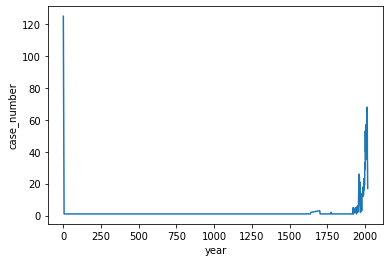

In [49]:
sns.lineplot(x='year', y='case_number', data= df_tiempo);

In [ ]:
# Vemos que el año 0 es el que más casos ha regitrado.
# Decidimos filtrar por los ataques ocurridos desde el 1900 en adelante, y así poder ver mejor la evolución

In [47]:
df_years = df[df['year']>= 1900]
df_years.sample(2)

,unnamed:_0,case_number,year,type,country,area,location,activity,name,age,time,species_,href,siglo,injury,date,month,fatal_y/n,sex_m_f
629,1726,2003.10.31.b,2003.0,Unprovoked,AUSTRALIA,New South Wales,"Lighthouse Beach, Seal Rocks",Surfing,Nick Anthony,22,17h30,"1.5 m [5'] shark, either a bronze whaler or a ...",http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,Left ankle & foot lacerated,31-Oct-2003,Oct,N,M
1088,2968,1982.08.29.b,1982.0,Invalid,USA,California,"Morro Rock, Morro Bay, San Obispo County",Surfing,John Buchanan,17,10h20,Questionable incident; reported as shark attac...,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,"No Injury, board bitten",29-Aug-1982,Aug,NaN,M


In [48]:
df_evolucion = df_years.groupby('year')['case_number'].size().reset_index().sort_values(by='case_number', ascending =False)
df_evolucion.head()

,year,case_number
97,2015.0,68
89,2007.0,57
94,2012.0,54
84,2002.0,53
95,2013.0,48


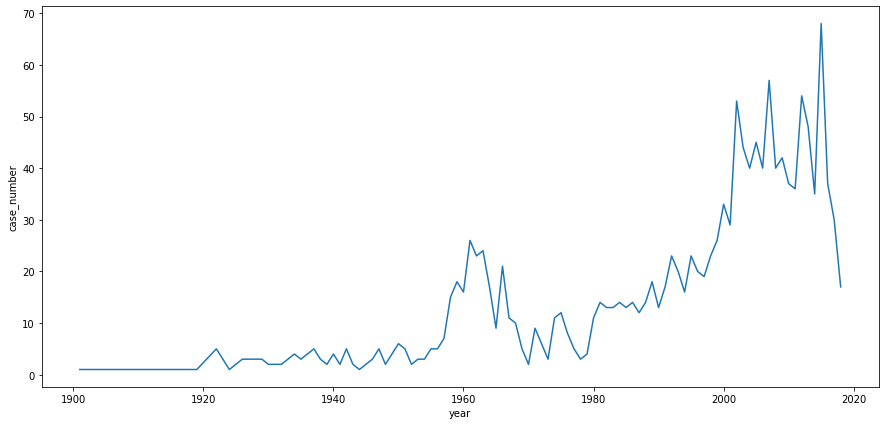

In [51]:
plt.figure(figsize=(15,7))
sns.lineplot(x='year', y='case_number', data= df_evolucion);

> Vemos que los casos (o el registro de los mismos) ha aumentado desde 1980, y ha comenzado a descender en 2018, justo al final del periodo de años que tenemos en nuestro conjunto de datos